In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('DB_dataset.csv')
df.shape,df.head()

((500, 2),
       Weight      Height
 0  67.062924  176.086355
 1  68.804094  178.388668
 2  60.930863  170.284496
 3  59.733843  168.691992
 4  65.431230  173.763679)

<Axes: >

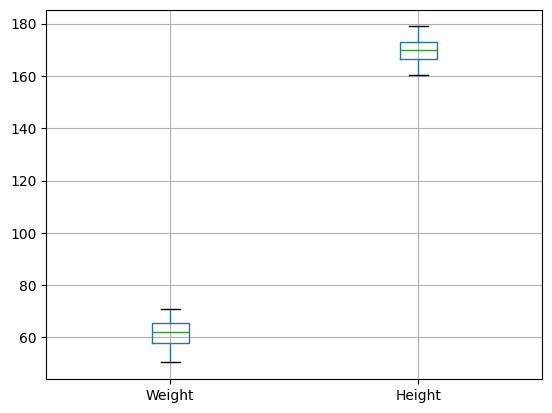

In [4]:
df.boxplot()

In [6]:
std_sca = StandardScaler()
features=pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
features.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [7]:
eps = np.arange(0.1,0.7,0.1)
eps

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [8]:
min_node = range(1,11)
min_node

range(1, 11)

In [9]:
output=[]
for i in eps:
    for j in min_node:
        labels = DBSCAN(eps=i,min_samples=j).fit(features).labels_
        score = silhouette_score(features,labels)
        output.append([i,j,score])
print(output)

[[np.float64(0.1), 1, np.float64(-0.04299681057231645)], [np.float64(0.1), 2, np.float64(0.2832200472847609)], [np.float64(0.1), 3, np.float64(0.42737747491884875)], [np.float64(0.1), 4, np.float64(0.5359027025302264)], [np.float64(0.1), 5, np.float64(0.48277502012945706)], [np.float64(0.1), 6, np.float64(0.4076103765285375)], [np.float64(0.1), 7, np.float64(0.4749535686603094)], [np.float64(0.1), 8, np.float64(0.36094434711787066)], [np.float64(0.1), 9, np.float64(0.3333993335941656)], [np.float64(0.1), 10, np.float64(0.3612527257725542)], [np.float64(0.2), 1, np.float64(0.4246458392966885)], [np.float64(0.2), 2, np.float64(0.4246458392966885)], [np.float64(0.2), 3, np.float64(0.4246458392966885)], [np.float64(0.2), 4, np.float64(0.6793428586100531)], [np.float64(0.2), 5, np.float64(0.6791715296437162)], [np.float64(0.2), 6, np.float64(0.6811897093459002)], [np.float64(0.2), 7, np.float64(0.6811897093459002)], [np.float64(0.2), 8, np.float64(0.6811897093459002)], [np.float64(0.2), 9, 

In [14]:
eps,min_node,score = sorted(output,reverse=True,key = lambda x:x[2])[0]
print(eps,min_node,score)

0.2 6 0.6811897093459002


In [15]:
labels=DBSCAN(eps=0.2,min_samples=6).fit(features).labels_

In [16]:
np.unique(labels)

array([-1,  0,  1,  2])

In [19]:
# Outliers indexes
np.where(labels<0)

(array([ 35, 166, 344, 429]),)

In [20]:
np.where(labels==0)

(array([  0,   1,   4,  11,  16,  21,  26,  32,  39,  43,  45,  48,  49,
         59,  60,  62,  63,  64,  67,  73,  75,  88,  92,  96,  97,  98,
        102, 107, 114, 116, 119, 122, 123, 125, 126, 127, 128, 137, 140,
        141, 142, 143, 151, 157, 160, 162, 163, 170, 172, 180, 181, 182,
        187, 190, 211, 212, 213, 215, 221, 225, 239, 240, 243, 247, 252,
        262, 264, 265, 269, 272, 274, 279, 280, 282, 284, 287, 291, 294,
        299, 300, 304, 305, 312, 325, 329, 332, 333, 335, 341, 342, 346,
        347, 348, 349, 351, 353, 357, 363, 364, 367, 393, 395, 397, 400,
        402, 411, 415, 420, 422, 424, 426, 431, 436, 441, 442, 449, 451,
        467, 469, 471, 488, 496]),)

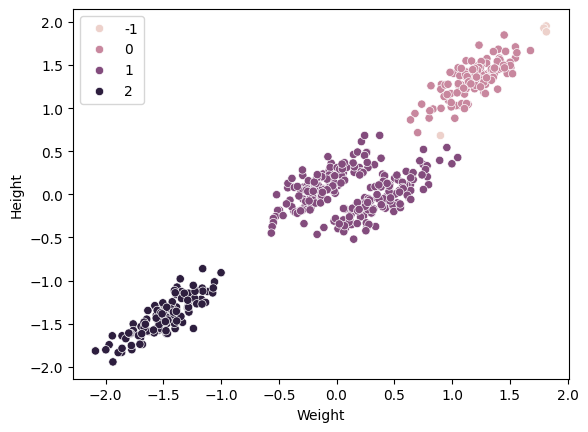

In [22]:
sns.scatterplot(data=features,x='Weight',y='Height',hue=labels)
plt.show()